# NLP for Hackers - Part 3 - Build a Custom Chunker

Notes from the fantastic book 'NLP for Hackers' by George-Bogdan Ivanov


# 1. Chunker (Shallow Parsing) Basics

Chunking, or **Shallow Parsing**, adds more structure on top of a Part-Of-Speech annotated text. The result of chunking is a **grouping of consecutive words that serve a single role.**

![](images/nlpforhackers_chunker.jpg)

Just with POS tags, as we saw in the last notebook, Chunking has it's own set of tags. Above you see:
- NP: Noun Phrase
- VP: Verb Phrase
- PP: Prepositional Phrase

There’s also **normal parsing, called deep parsing,** which has as a result an entire syntax tree. As you can probably guess, **Deep Parsing is a much more complex task, more prone to errors and much slower than simple chunking.** Obviously, it really depends on the situation and deciding which tool would best solve the task should be made on a case-by-case basis. 

Let’s see how shallow and deep parsers compare:

**Shallow parser:**
```
(S
    (NP The/DT quick/JJ brown/NN fox/NN)
    (VP jumps/VBZ)
    (PP over/IN)
    (NP the/DT lazy/JJ dog/NN)
./.)
```

**Deep parser:**

```
(S
    (NP The/DT quick/JJ brown/JJ fox/NN)
    (VP jumps/VBZ
        (PP over/IN
            (NP the/DT lazy/JJ dog/NN)))
(. .))
```

We can use `nltk.ne_chunk` to visualize shallow parse trees. The ne_chunk method is simply applying a pre trained chunker that is installed with nlkt. It can be implemented as follows:

In [11]:
# We have to first add the ghost script to our environment so nltk.tree works properly
# More details here https://www.ghostscript.com/download/gsdnld.html
import os
path_to_gs = "C:\\Program Files\\gs\\gs9.24\\bin"
os.environ['PATH'] += os.pathsep + path_to_gs

In [12]:
# Get tagged tokens
import nltk
sentence = """The Quick Brown Fox jumps over the Lazy Dog."""
tokens = nltk.word_tokenize(sentence)
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens

[('The', 'DT'),
 ('Quick', 'NNP'),
 ('Brown', 'NNP'),
 ('Fox', 'NNP'),
 ('jumps', 'VBZ'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('Lazy', 'NNP'),
 ('Dog', 'NNP'),
 ('.', '.')]

(S
  The/DT
  (ORGANIZATION Quick/NNP Brown/NNP Fox/NNP)
  jumps/VBZ
  over/IN
  the/DT
  (ORGANIZATION Lazy/NNP Dog/NNP)
  ./.)


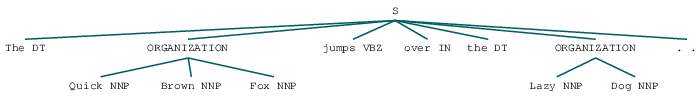

In [13]:
from IPython.display import display
#Use pretrained ne_chunk model
ner_annotated_tree = nltk.ne_chunk(tagged_tokens)
print(ner_annotated_tree)
display(ner_annotated_tree) # NOTE this isnt working for some reaosn...

# 2. Under the hood: IOB Tagging

Shallow parsing is a pretty easy task and is **similar to Part-of-Speech tagging**. In fact, it can be **reduced to a tagging problem.** To understand how it works, we need to learn a new tagging technique, called **IOB Tagging (or BIO Tagging).** 

IOB Tagging is useful especially for **annotating multi-word (or consecutive words) sequences.** As you probably noticed in the previous example, some tokens are grouped under a single label representing such a grouping. Here’s how the IOB tags
look:

- `B-<CHUNK_TYPE>` : for the word from the Beginning of the chunk
- `I-<CHUNK_TYPE>` : for words Inside the chunk
- `O` : Outside any chunk

To reiterate, the `B-<CHUNK_TYPE>` marks the beginning of a chunk CHUNK_TYPE and the `I-<CHUNK_TYPE>` marks that we’re inside of a chunk CHUNK_TYPE. The O marks that we’re outside of any type of chunk. 

Here’s how our sample sentence looks like when presented in IOB tagged form:

```
[('The', 'DT', 'B-NP'),
('quick', 'JJ', 'I-NP'),
('brown', 'NN', 'I-NP'),
('fox', 'NN', 'I-NP'),
('jumps', 'VBZ', 'B-VP'),
('over', 'IN', 'B-PP'),
('the', 'DT', 'B-NP'),
('lazy', 'JJ', 'I-NP'),
('dog', 'NN', 'I-NP'),
('.', '.', 'O')]
```

NLTK also has a chunking corpus, CoNLL Dataset, which we will explore now!

In [14]:
from nltk.corpus import conll2000

# Import data in tree format
tree_sent = conll2000.chunked_sents()
print(len(tree_sent))
tree_sent[0:1]

10948


[Tree('S', [Tree('NP', [('Confidence', 'NN')]), Tree('PP', [('in', 'IN')]), Tree('NP', [('the', 'DT'), ('pound', 'NN')]), Tree('VP', [('is', 'VBZ'), ('widely', 'RB'), ('expected', 'VBN'), ('to', 'TO'), ('take', 'VB')]), Tree('NP', [('another', 'DT'), ('sharp', 'JJ'), ('dive', 'NN')]), ('if', 'IN'), Tree('NP', [('trade', 'NN'), ('figures', 'NNS')]), Tree('PP', [('for', 'IN')]), Tree('NP', [('September', 'NNP')]), (',', ','), ('due', 'JJ'), Tree('PP', [('for', 'IN')]), Tree('NP', [('release', 'NN')]), Tree('NP', [('tomorrow', 'NN')]), (',', ','), Tree('VP', [('fail', 'VB'), ('to', 'TO'), ('show', 'VB')]), Tree('NP', [('a', 'DT'), ('substantial', 'JJ'), ('improvement', 'NN')]), Tree('PP', [('from', 'IN')]), Tree('NP', [('July', 'NNP'), ('and', 'CC'), ('August', 'NNP')]), Tree('NP', [("'s", 'POS'), ('near-record', 'JJ'), ('deficits', 'NNS')]), ('.', '.')])]

In [15]:
# Import data 
tree_words = conll2000.chunked_words()
print(len(tree_words))
tree_words[0:10]

166433


[Tree('NP', [('Confidence', 'NN')]),
 Tree('PP', [('in', 'IN')]),
 Tree('NP', [('the', 'DT'), ('pound', 'NN')]),
 Tree('VP', [('is', 'VBZ'), ('widely', 'RB'), ('expected', 'VBN'), ('to', 'TO'), ('take', 'VB')]),
 Tree('NP', [('another', 'DT'), ('sharp', 'JJ'), ('dive', 'NN')]),
 ('if', 'IN'),
 Tree('NP', [('trade', 'NN'), ('figures', 'NNS')]),
 Tree('PP', [('for', 'IN')]),
 Tree('NP', [('September', 'NNP')]),
 (',', ',')]

### Converting between nltk.trees and IOB tripliets
As you can notice, in NLTK the default way of representing Shallow Parses is with **nltk.Tree.** We can transform the chunked sentence (represented as a nltk.Tree) to IOB tagged triplets using NLTKs `tree2conlltags` function, and revert back to a tree format using the `tree2conlltags` function:

In [16]:
# Convert tree to iob tags
from nltk.chunk import tree2conlltags
iob = tree2conlltags(tree_sent[0])
iob[0:15]

[('Confidence', 'NN', 'B-NP'),
 ('in', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('pound', 'NN', 'I-NP'),
 ('is', 'VBZ', 'B-VP'),
 ('widely', 'RB', 'I-VP'),
 ('expected', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('take', 'VB', 'I-VP'),
 ('another', 'DT', 'B-NP'),
 ('sharp', 'JJ', 'I-NP'),
 ('dive', 'NN', 'I-NP'),
 ('if', 'IN', 'O'),
 ('trade', 'NN', 'B-NP'),
 ('figures', 'NNS', 'I-NP')]

In [17]:
# Convert IOB tags to tree
from nltk.chunk import conlltags2tree
tree = conlltags2tree(iob)
print(tree)

(S
  (NP Confidence/NN)
  (PP in/IN)
  (NP the/DT pound/NN)
  (VP is/VBZ widely/RB expected/VBN to/TO take/VB)
  (NP another/DT sharp/JJ dive/NN)
  if/IN
  (NP trade/NN figures/NNS)
  (PP for/IN)
  (NP September/NNP)
  ,/,
  due/JJ
  (PP for/IN)
  (NP release/NN)
  (NP tomorrow/NN)
  ,/,
  (VP fail/VB to/TO show/VB)
  (NP a/DT substantial/JJ improvement/NN)
  (PP from/IN)
  (NP July/NNP and/CC August/NNP)
  (NP 's/POS near-record/JJ deficits/NNS)
  ./.)


# 3. Implementing the Chunk Parser

The base class for implementing chunkers in NLTK is called `nltk.ChunkParserI`. Let’s extend that class and wrap inside it the ClassifierBasedTaggerBatchTrained we built in the previous chapter.

In [18]:
# Input-Output function
def print_io(function, input_, args=None, input_idx=0):
    """Function to quickly print inputs and outputs of a function:
        function: function to run
        input_: input to funciton
        args: list of args to be fed into function
        input_idx: index of input_ in the args list (defaults to zero)"""    
    if args:
        args.insert(input_idx, input_)
        output = function(*args)
    else:
        output = function(input_)
    func_name = function.__name__
    print("{} INPUT:\n".format(func_name), input_)
    print("\n{} OUTPUT:\n".format(func_name),output)

## 3.1 Build custome tree-to-tags functions 

Simple functions for converting triple tags to ((word,pos),chunk) format. This will be useful later on.

In [19]:
def triplets2tagged_pairs(iob_sent):
    """
    Transform the triplets to tagged pairs:
    [(word1, pos1, iob1), (word2, pos2, iob2), ...] ->
    [((word1, pos1), iob1), ((word2, pos2), iob2),...]
    """
    return [((word, pos), chunk) for word, pos, chunk in iob_sent]

def tagged_pairs2triplets(iob_sent):
    """
    Transform the triplets to tagged pairs:
    [((word1, pos1), iob1), ((word2, pos2), iob2),...] ->
    [(word1, pos1, iob1), (word2, pos2, iob2), ...]
    """
    return [(word, pos, chunk) for (word, pos), chunk in iob_sent]

print_io(triplets2tagged_pairs, iob)

triplets2tagged_pairs INPUT:
 [('Confidence', 'NN', 'B-NP'), ('in', 'IN', 'B-PP'), ('the', 'DT', 'B-NP'), ('pound', 'NN', 'I-NP'), ('is', 'VBZ', 'B-VP'), ('widely', 'RB', 'I-VP'), ('expected', 'VBN', 'I-VP'), ('to', 'TO', 'I-VP'), ('take', 'VB', 'I-VP'), ('another', 'DT', 'B-NP'), ('sharp', 'JJ', 'I-NP'), ('dive', 'NN', 'I-NP'), ('if', 'IN', 'O'), ('trade', 'NN', 'B-NP'), ('figures', 'NNS', 'I-NP'), ('for', 'IN', 'B-PP'), ('September', 'NNP', 'B-NP'), (',', ',', 'O'), ('due', 'JJ', 'O'), ('for', 'IN', 'B-PP'), ('release', 'NN', 'B-NP'), ('tomorrow', 'NN', 'B-NP'), (',', ',', 'O'), ('fail', 'VB', 'B-VP'), ('to', 'TO', 'I-VP'), ('show', 'VB', 'I-VP'), ('a', 'DT', 'B-NP'), ('substantial', 'JJ', 'I-NP'), ('improvement', 'NN', 'I-NP'), ('from', 'IN', 'B-PP'), ('July', 'NNP', 'B-NP'), ('and', 'CC', 'I-NP'), ('August', 'NNP', 'I-NP'), ("'s", 'POS', 'B-NP'), ('near-record', 'JJ', 'I-NP'), ('deficits', 'NNS', 'I-NP'), ('.', '.', 'O')]

triplets2tagged_pairs OUTPUT:
 [(('Confidence', 'NN'), 'B-N

## 3.2 Chunk Feature Detector

Just like we did for the POS features, we need to create a function to extract IOB features. Note that nltk has its own chunk feature detector, accessed through via `nltk.chunk.named_entity import NEChunkParserTagger`, however as per usual, we are going to build our own from scratch! Just for funsies. 

In [20]:
from nltk.stem.snowball import SnowballStemmer
import re
stemmer = SnowballStemmer('english')

# Bring the shape function back in!
def shape(word):
    if re.match('[0-9]+(\.[0-9]*)?|[0-9]*\.[0-9]+$', word):
        return 'number'
    elif re.match('\W+$', word):
        return 'punct'
    elif re.match('[A-Z][a-z]+$', word):
        return 'capitalized'
    elif re.match('[A-Z]+$', word):
        return 'uppercase'
    elif re.match('[a-z]+$', word):
        return 'lowercase'
    elif re.match('[A-Z][a-z]+[A-Z][a-z]+[A-Za-z]*$', word):
        return 'camelcase'
    elif re.match('[A-Za-z]+$', word):
        return 'mixedcase'
    elif re.match('__.+__$', word):
        return 'wildcard'
    elif re.match('[A-Za-z0-9]+\.$', word):
        return 'ending-dot'
    elif re.match('[A-Za-z0-9]+\.[A-Za-z0-9\.]+\.$', word):
        return 'abbreviation'
    elif re.match('[A-Za-z0-9]+\-[A-Za-z0-9\-]+.*$', word):
        return 'contains-hyphen'
    return 'other'

def chunk_features(sentence, index, history, print_results=False):
    """
    `sentence` = a POS-tagged sentence [(w1, t1), ...]
    `index` = the index of the token we want to extract features for
    `history` = the previous predicted IOB tags
    """
    # Pad the sequence with placeholders
    sentence = ([('__START2__', '__START2__'), ('__START1__', '__START1__')] + # APPEND START SENTENCE/TAGS
              list(sentence) +
              [('__END1__', '__END1__'), ('__END2__', '__END2__')]) # APPEND END SENTENCE/TAGS
    history = ['__START2__', '__START1__'] + list(history)
    # shift the index with 2, to accommodate the padding
    index += 2
    word, pos = sentence[index]
    prevword, prevpos = sentence[index - 1]
    prevprevword, prevprevpos = sentence[index - 2]
    nextword, nextpos = sentence[index + 1]
    nextnextword, nextnextpos = sentence[index + 2]
    word_shape = shape(word)
    features = {'word': word, 
            'lemma': stemmer.stem(word), 
            'shape': word_shape,
            'pos': pos, 
            'next-word': nextword, 
            'next-pos': nextpos,
            'next-next-word': nextnextword,
            'nextnextpos': nextnextpos,
            'prev-word': prevword,
            'prev-pos': prevpos,
            'prev-prev-word': prevprevword,
            'prev-prev-pos': prevprevpos,
            # Historical features
            'prev-chunk': history[-1],
            'prev-prev-chunk': history[-2]}
    return features

In [21]:
# Extract a single 
tagged_pairs = triplets2tagged_pairs(tree2conlltags(tree_sent[0]))
pos, chunks = zip(*tagged_pairs)
print_io(chunk_features, input_=pos[0:5], args=[0,[]], input_idx=0)

chunk_features INPUT:
 (('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ('pound', 'NN'), ('is', 'VBZ'))

chunk_features OUTPUT:
 {'word': 'Confidence', 'lemma': 'confid', 'shape': 'capitalized', 'pos': 'NN', 'next-word': 'in', 'next-pos': 'IN', 'next-next-word': 'the', 'nextnextpos': 'DT', 'prev-word': '__START1__', 'prev-pos': '__START1__', 'prev-prev-word': '__START2__', 'prev-prev-pos': '__START2__', 'prev-chunk': '__START1__', 'prev-prev-chunk': '__START2__'}


## 3.3 Build the tagging classifier

Since this is still just a tagging exercise, we can use the re-use our tagger from the previous exercise. Recall that the wrapper has the following steps:
1. Convert dataset to necessary format
2. Vectorizez the dataset (either with DictVectorizer or FeatureHasher)
3. Fit the model (partial fit if you are using FeatureHasher)
4. Predict and evaluate (to be run after model has been fitted)

We will create a new function called `Mikes_Chunk_Tagger`, and we wrap it around `Mikes_POS_Tagger` so we don't have to write all the code again. However we have coppied and pasted the original pos tagger below for a refresher.

In [25]:
from NLP_custom import Mikes_POS_Tagger
[method for method in dir(Mikes_POS_Tagger) if not(method.startswith("__"))]

['_extract_all_labels',
 '_tags_to_dataset',
 '_vectorize',
 'accuracy',
 'evaluate',
 'fit',
 'partial_fit',
 'tag',
 'tag_sents']

In [44]:
from time import time
import itertools
import nltk
from nltk.tag.util import untag
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import DictVectorizer
from nltk.chunk import tree2conlltags
from itertools import chain

class Mikes_Chunk_Parser(Mikes_POS_Tagger):
    def triplets2tagged_pairs(self, iob_sent):
        """
        Transform the triplets to tagged pairs:
        [(word1, pos1, iob1), (word2, pos2, iob2), ...] ->
        [((word1, pos1), iob1), ((word2, pos2), iob2),...]
        """
        return [((word, pos), chunk) for word, pos, chunk in iob_sent]

    def trees2tagged_pairs(self, trees):
        """
        Transform nltk.trees to tuples (word, pos_tag, iob_tag)
        """
        # Use nltk.tree2conlltags to transform trees into triple suples (word, pos_tag, IOB_tag)
        chunked_sentences = [tree2conlltags(sent) for sent in trees]
        # Use custom util function to transform tuples to format: ((word, pos_tag),IOB_tag)
        return [self.triplets2tagged_pairs(sent) for sent in chunked_sentences]
    
    def _tags_to_dataset(self, trees):
        """
        Helper function:
          Take in train data (tree sentences) and return feature dict (pre-vectorized dataset)
        """
        chunked_sentences = self.trees2tagged_pairs(trees)
        # Initialize empty featursets list
        classifier_corpus = []
        for sentence in chunked_sentences:
            # Initialize empty history list (will be updated as loop through each word in sent)
            history = []
            # Use zip(* ) to zip tokens & tags into two separate lists
            sentence_tokens, sentence_tags = zip(*sentence)
            # Loop through each word in sentence
            # Duplicate words are kept because contexts (prev/post words) may differ
            for index in range(len(sentence)):
                # Use the feature detector (eg. pos_features) initialized with the class
                featureset = self.feature_detector(sentence_tokens, index, history)
                # Update featursets list with tuple (featureset, tag)
                classifier_corpus.append((featureset, sentence_tags[index]))
                # Update history for next index word
                history.append(sentence_tags[index])
        return classifier_corpus
    
    def evaluate(self, test_set, verbose=None):
        """
        Evaluation function:
          Returns 'accuracy' metric using sklearn built-in 'score' method.
        """
        t0=time()
        test_set = self.trees2tagged_pairs(test_set)
        untagged_sents = [untag(sent) for sent in test_set]
        retagged_sents = self.tag_sents(untagged_sents)
        preds = list(chain(*retagged_sents))
        actual = list(chain(*test_set))
        score = self.accuracy(actual, preds)
        if verbose:
            print("Accuracy: {}, Eval Runtime: {:.2f}".format(score, time()-t0))
        return score

In [27]:
len(conll2000.chunked_sents())

10948

In [31]:
parser = Mikes_Chunk_Parser(feature_detector=chunk_features, sparse=True)
parser.fit(conll2000.chunked_sents()[0:9000])
parser.evaluate(conll2000.chunked_sents()[9000:])

Commencing feature extraction...
Training model on features set size (213155, 105880)

Training complete. Total runtime: 16.64 sec


0.9495962915406211

In [43]:
test_sent  = "The quick brown fox jumps over the lazy dog."
test_tokens = nltk.word_tokenize(test_sent)
test_tagged = nltk.pos_tag(test_tokens)
test_parsed = parser.tag(test_tagged)
test_parsed

[(('The', 'DT'), 'B-NP'),
 (('quick', 'JJ'), 'I-NP'),
 (('brown', 'NN'), 'I-NP'),
 (('fox', 'NN'), 'I-NP'),
 (('jumps', 'VBZ'), 'B-VP'),
 (('over', 'IN'), 'B-PP'),
 (('the', 'DT'), 'B-NP'),
 (('lazy', 'JJ'), 'I-NP'),
 (('dog', 'NN'), 'I-NP'),
 (('.', '.'), 'O')]